# Wine Dataset
<img src="https://storage.googleapis.com/kaggle-datasets-images/1436/2571/16febb8d281d37d8d3c73ed7c32679bc/dataset-original.jpg" width=250>

The code below loads in the data set <b>wine-data.csv</b> into a variable <b>wines</b> as <b>list of lists</b>. <br>We’ll perform statistics on wines.

In [203]:
import pandas as pd
df = pd.read_csv('wine-data.csv')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,12,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,95,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,100,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,85,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,88,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Measures of Central Tendency

### The mean is a descriptive statistic that looks at the average value of a data set.
<img src="https://i.ibb.co/JFT50Km/Mean.png" alt="Mean" width="450">

In [204]:
df.mean()

points    88.909091
price     21.090909
dtype: float64

### Median
The median also attempts to define a typical value in the data set, but unlike mean, does not require calculation. To find the median, we first need to reorganize our data set in ascending order. Then the median is the value that coincides with the middle of the data set. If there are an even amount of items, then we take the average of the two values that would “surround” the middle. 

<img src="https://i.ibb.co/Zd0LvTB/Median.png" alt="Median" width=400>

In [205]:
df.median()
df.median().points

87.0

### First and Second Quartiles - Inter Quartile Range (IQR)
<img src="https://i.ibb.co/WBhw0vr/IQR.png" alt="IQR" width=350>

In [206]:
df.describe()

,points,price
count,11.000000,11.000000
mean,88.909091,21.090909
std,7.435786,15.352228
min,77.000000,12.000000
25%,85.000000,13.500000
50%,87.000000,15.000000
75%,95.500000,21.500000
max,100.000000,65.000000


### Mode
The last measure of central tendency that we’ll discuss is the mode. The mode is defined as the value that appears the most frequently in our data. The intuition of the mode as the “middle” is not as immediate as mean or median, but there is a clear rationale. If a value appears repeatedly throughout the data, we also know it will influence the average towards the modal value. The more a value appears, the more it will influence the mean. Thus, a mode represents the highest weighted contributing factor to our mean. 

In [207]:
print(df['price'].mode())
print(df.points.mode())

0    12
1    15
dtype: int64
0    85
1    87
dtype: int64


### Range

In [208]:
max(df['points'])-min(df['points']), max(df['price'])-min(df['price'])

(23, 53)

### Variance
Statistical variance gives a measure of how the data distributes itself about the mean or expected value. Unlike range that only looks at the extremes, the variance looks at all the data points and then determines their distribution.
<img src="https://i.ibb.co/Lz8Z45J/variance.jpg" alt="variance" width="350">

In [209]:
df.var()

points     55.290909
price     235.690909
dtype: float64

### Standard Deviation
The standard deviation is also a measure of the spread of your observations, but is a statement of how much your data deviates from a typical data point. That is to say, the standard deviation summarizes how much your data differs from the mean.
<img src="SD.png" width=500>

In [210]:
df.std()

points     7.435786
price     15.352228
dtype: float64

### Histogram

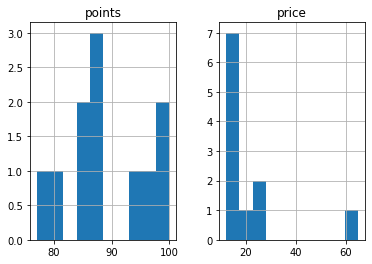

In [211]:
df.hist();

### Skew

In [212]:
df.skew()

points    0.049885
price     2.766640
dtype: float64

### Q. Which variety of wine has the highest price?

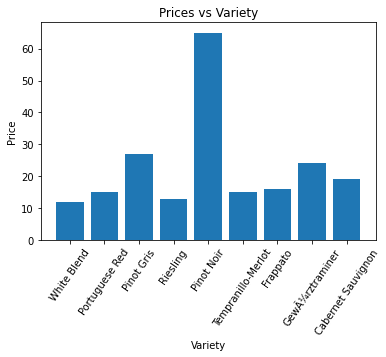

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df['variety'],df['price'])
plt.title('Prices vs Variety')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.xticks(rotation=55)
plt.show()

### Q. Does wine which has got more rating, cost higher? 

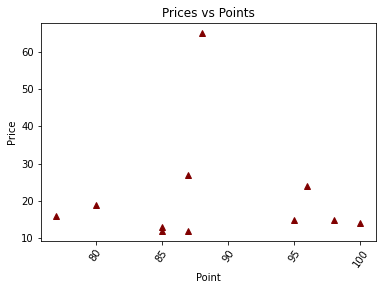

In [215]:
%matplotlib inline
plt.plot(df['points'],df['price'],'g^',color='maroon')
plt.title('Prices vs Points')
plt.xlabel('Point')
plt.ylabel('Price')
plt.xticks(rotation=55)
plt.show()

### Q. Which country has the highest quality (rating) wine, on an average?

In [216]:
import numpy as np
wine=df['points'].groupby(df['country'])
wine_mean=wine.agg(np.mean)
wine.groups, wine_mean

({'France': [7, 9], 'Germany': [8], 'Italy': [0, 6], 'Portugal': [1], 'Spain': [5], 'US': [2, 3, 4, 10]},
 country
 France      91.50
 Germany     85.00
 Italy       82.00
 Portugal    95.00
 Spain       98.00
 US          88.25
 Name: points, dtype: float64)

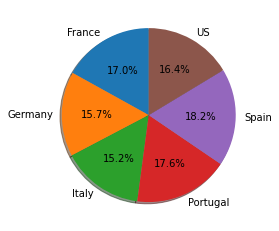

In [305]:
plt.pie(wine_mean,labels=wine.groups,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [218]:
v = np.array([[30, 20, 10], [10, 20, 30]])
w = np.array([45, 55, 66])
v+w

array([[75, 75, 76],
       [55, 75, 96]])

In [219]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,9).reshape(1,3)
c=np.append(a,b,axis=0)
c

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [272]:
d=pd.read_csv('matches.csv')

In [323]:
import matplotlib.pyplot as plt
%matplotlib inline
dups_shape = d.pivot_table(index=['city'], aggfunc='size')
dups_shape

city
Abu Dhabi          7
Ahmedabad         12
Bangalore         66
Bloemfontein       2
Cape Town          7
Centurion         12
Chandigarh        46
Chennai           48
Cuttack            7
Delhi             60
Dharamsala         9
Durban            15
East London        3
Hyderabad         49
Indore             5
Jaipur            33
Johannesburg       8
Kanpur             4
Kimberley          3
Kochi              5
Kolkata           61
Mumbai            85
Nagpur             3
Port Elizabeth     7
Pune              32
Raipur             6
Rajkot            10
Ranchi             7
Sharjah            6
Visakhapatnam     11
dtype: int64